# Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Data Collection & Processing

In [2]:
sales_data=pd.read_csv("Advertising.csv")

In [3]:
sales_data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
sales_data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
sales_data=sales_data.drop(columns=['Unnamed: 0'])

In [6]:
sales_data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
sales_data.shape

(200, 4)

In [8]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
X=sales_data.iloc[:,0:-1]

In [11]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [12]:
X.iloc[:,0]

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [13]:
y=sales_data.iloc[:,-1]

In [14]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [15]:
sales_data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


C:\Users\MOHAMMED RIFAIZ\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


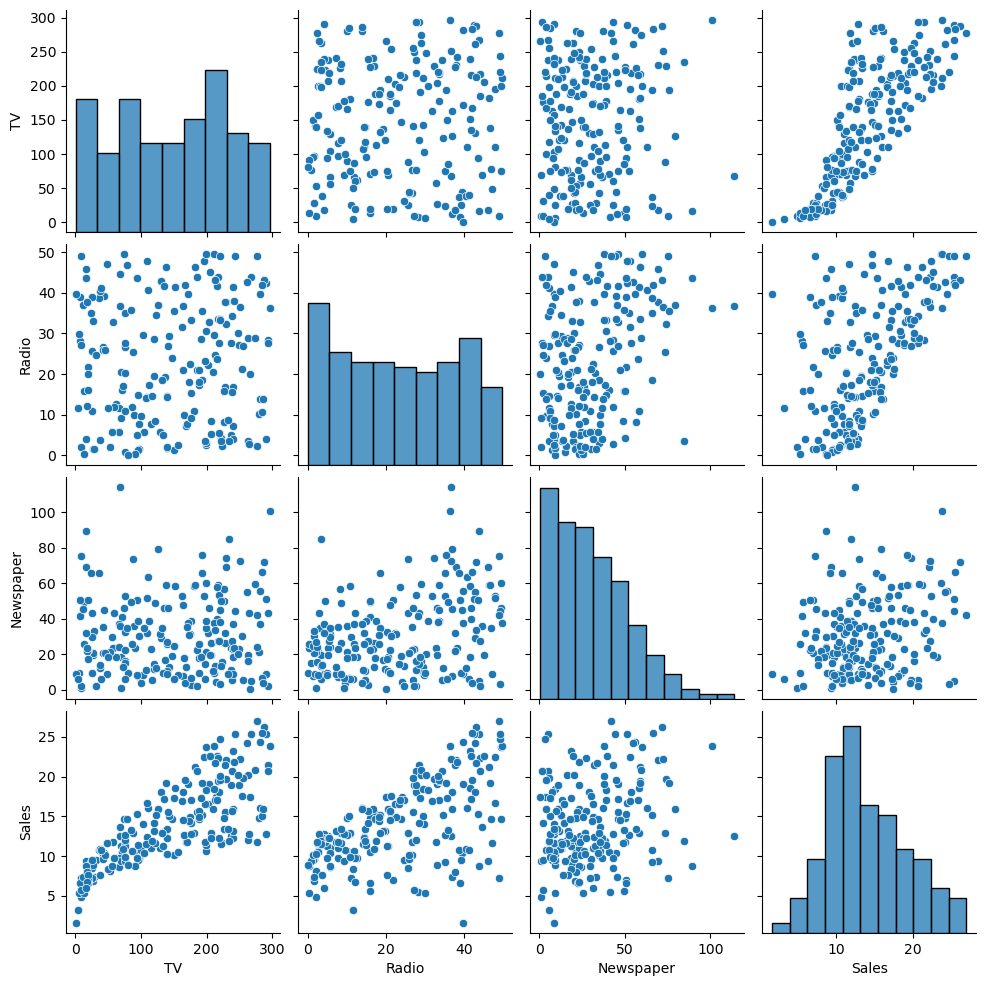

In [16]:
sns.pairplot(data=sales_data)
plt.show()

In [17]:
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_train

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [19]:
X_test

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 160, dtype: float64

In [20]:
y_train

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [21]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [35]:
X_train=X_train.astype(int)
X_test=X_test.astype(int)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [36]:
st=StandardScaler()

In [37]:
X_train_scaled = st.fit_transform(X_train)
X_test_scaled = st.transform(X_test)

### Linear Regression Model

In [38]:
lr=LinearRegression()

In [40]:
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [41]:
y_pred=lr.predict(X_test_scaled)

In [42]:
y_pred

array([16.40149547, 20.86584595, 21.5692108 , 10.53639523, 22.21229875,
       13.22793095, 20.96908441,  7.45508578, 13.60817806, 15.1665493 ,
        9.02263205,  6.61892691, 14.36166256,  8.83054379,  9.74954545,
       12.11055866,  8.8281855 , 16.28722443, 10.3219136 , 18.82401534,
       19.60761104, 13.24984979, 12.39742789, 21.29846855,  7.86968657,
        5.8914308 , 20.8533943 , 11.97643122,  9.12981098,  8.56386534,
       12.41527677, 10.0109668 , 21.40368791, 12.22204482, 18.16983049,
       20.17791676, 14.16266496, 20.7691812 , 10.97808467,  4.53693561])

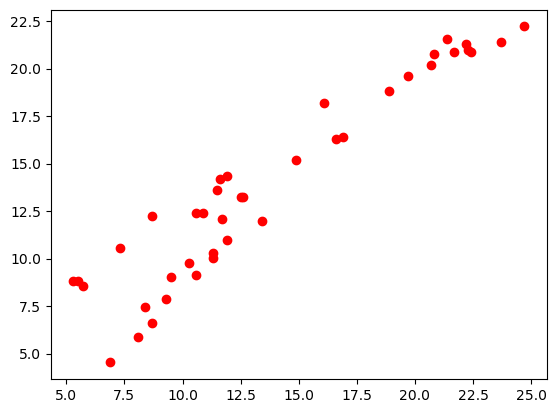

In [43]:
plt.scatter(y_test,y_pred,c='r')

In [60]:
MAE=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",MAE)

Mean Absolute Error: 1.4607567168117606


In [61]:
MSE=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",MSE)

Mean Squared Error: 3.1740973539761055


In [62]:
r2_score=r2_score(y_test,y_pred)
print("R2 Score:",r2_score)

R2 Score: 0.899438024100912


### Visualization Using Bar Plot

In [45]:
comparison_df=pd.DataFrame({'Actual Sales':y_test,'Predicted Sales':y_pred})

<Figure size 1000x600 with 0 Axes>

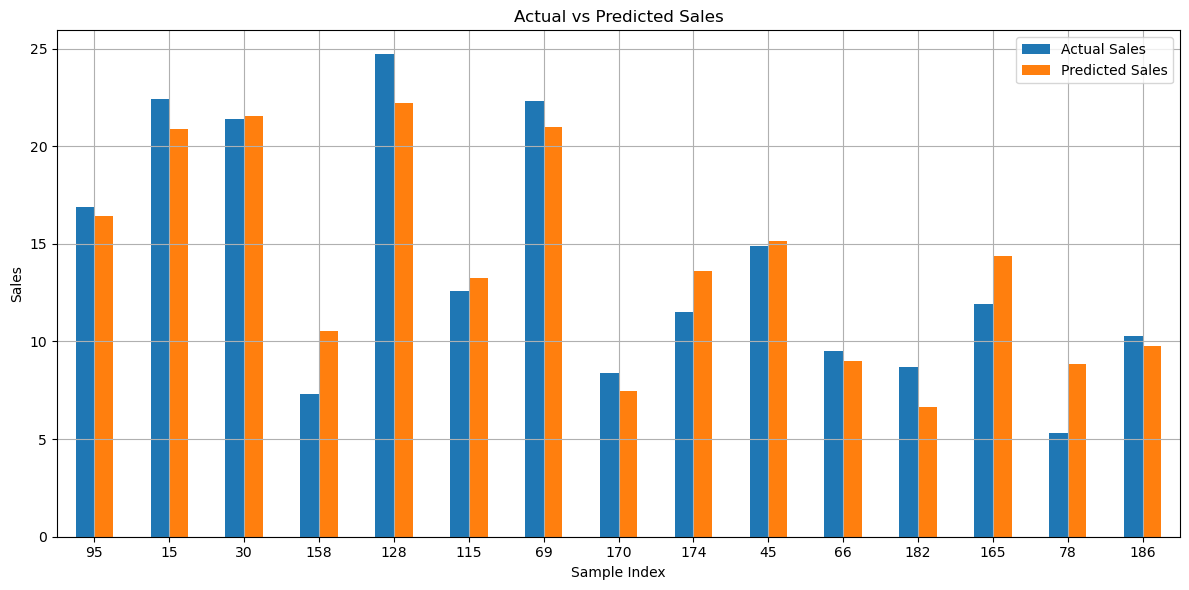

In [46]:
plt.figure(figsize=(10,6))
comparison_df.head(15).plot(kind='bar',figsize=(12,6))
plt.title('Actual vs Predicted Sales')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualization Using Pie Plot

In [47]:
actual_sum=np.sum(y_test)
predicted_sum=np.sum(y_pred)

In [48]:
labels=['Actual Sales','Predicted Sales']
sizes=[actual_sum,predicted_sum]
colors=['#ff9999','#66b3ff']
explode=(0.1,0)

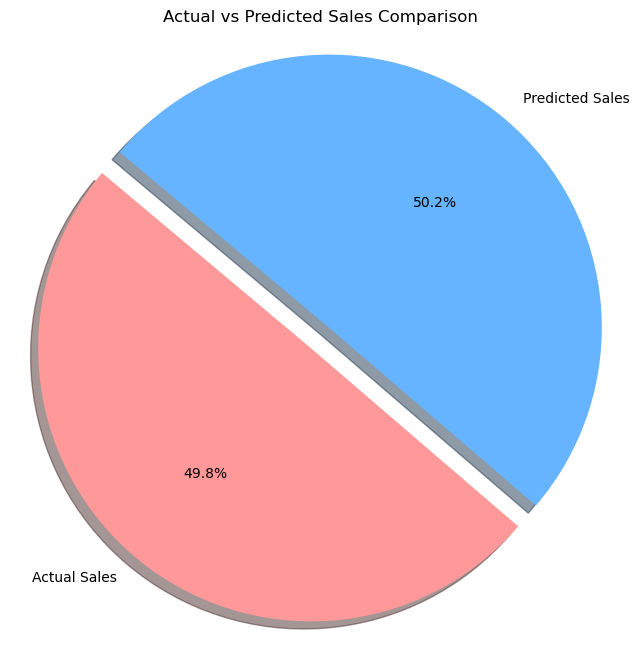

In [49]:
plt.figure(figsize=(8,8))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.title('Actual vs Predicted Sales Comparison')
plt.axis('equal')
plt.show()